In [44]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
!pip install scikit-learn==1.3.0

In [46]:
df=pd.read_csv('/content/Iris.csv')
df=pd.read_csv('/content/Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df = df.iloc[5:]  # Keep rows starting from index 5
df = df.reset_index(drop=True)  # Reset the index to start from 0
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.4,3.9,1.7,0.4,Iris-setosa
1,4.6,3.4,1.4,0.3,Iris-setosa
2,5.0,3.4,1.5,0.2,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,4.9,3.1,1.5,0.1,Iris-setosa


In [48]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,145.000000,145.000000,145.00000,145.000000
mean,5.877241,3.046207,3.84000,1.233103
std,0.820717,0.436848,1.73819,0.752870
min,4.300000,2.000000,1.00000,0.100000
25%,5.200000,2.800000,1.60000,0.400000
50%,5.800000,3.000000,4.40000,1.300000
75%,6.400000,3.300000,5.10000,1.800000
max,7.900000,4.400000,6.90000,2.500000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  145 non-null    float64
 1   sepal_width   145 non-null    float64
 2   petal_length  145 non-null    float64
 3   petal_width   145 non-null    float64
 4   species       145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.8+ KB


In [50]:
df['species'].value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,50
Iris-setosa,45


In [51]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


<Axes: >

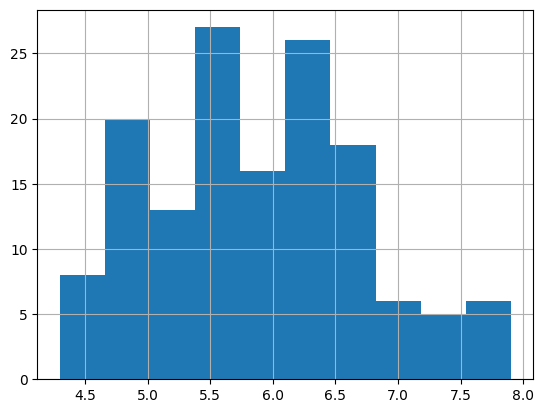

In [52]:
df['sepal_length'].hist()

<Axes: >

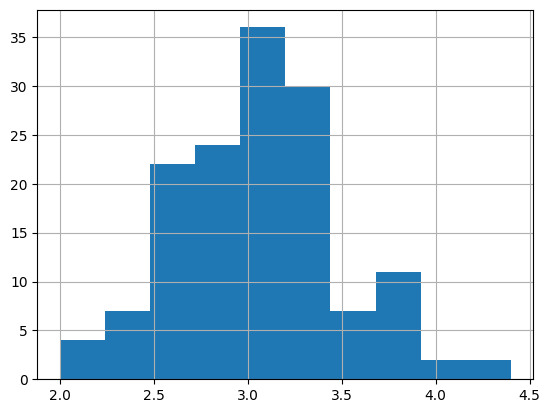

In [53]:
df['sepal_width'].hist()

<Axes: >

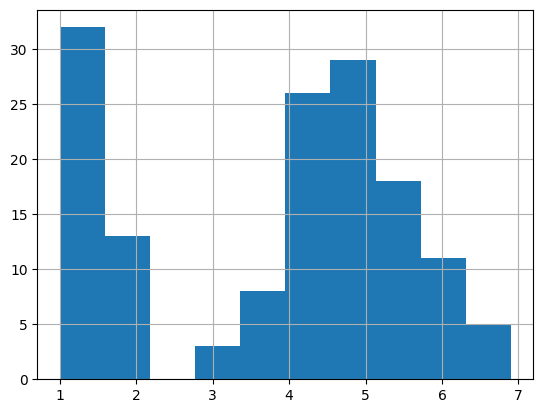

In [54]:
df['petal_length'].hist()

<Axes: >

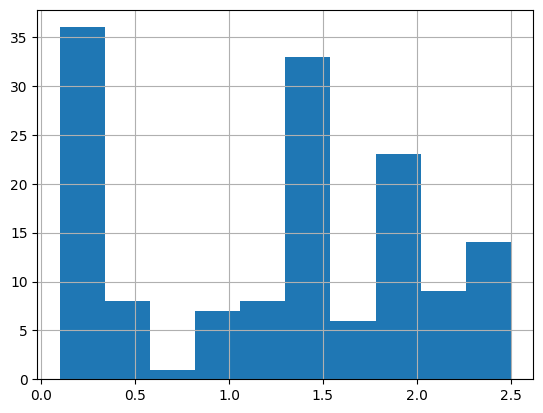

In [55]:
df['petal_width'].hist()

In [56]:
colors = ['red', 'orange', 'blue']
species =['virginica', 'versicolor', 'setosa']

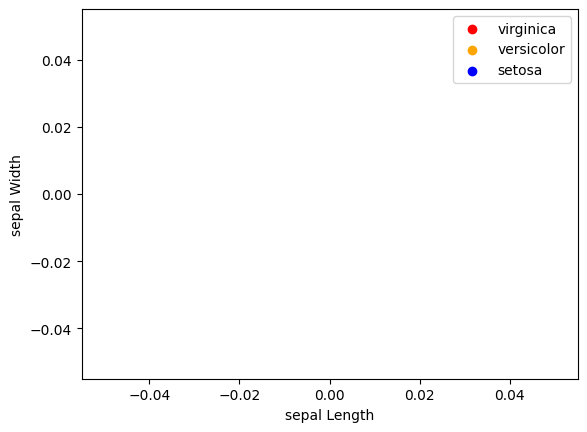

In [57]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("sepal Width")
plt.legend()


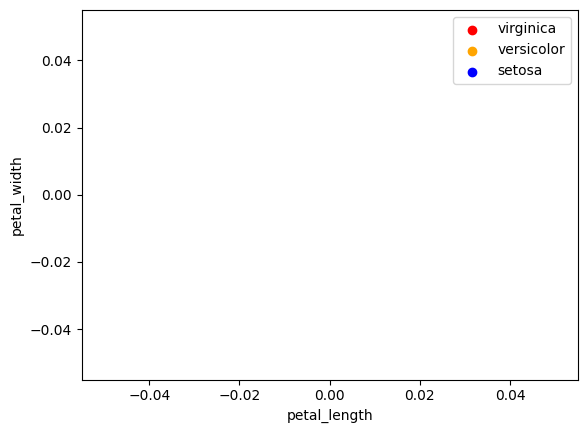

In [58]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c= colors[i], label=species[i])
  plt.xlabel("petal_length")
  plt.ylabel("petal_width")
  plt.legend()

In [59]:
# Convert the 'species' column to a numerical representation
df['species'] = df['species'].astype('category').cat.codes

# Now calculate the correlation matrix
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.093893,0.865484,0.808519,0.771740
sepal_width,-0.093893,1.000000,-0.413086,-0.346532,-0.411985
petal_length,0.865484,-0.413086,1.000000,0.960386,0.946253
petal_width,0.808519,-0.346532,0.960386,1.000000,0.954052
species,0.771740,-0.411985,0.946253,0.954052,1.000000


<Axes: >

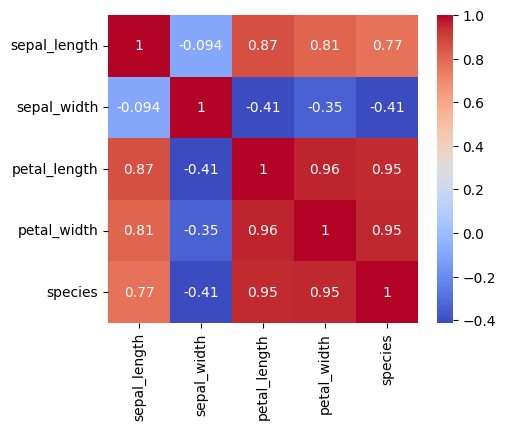

In [60]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm') # Changed 'coolware' to 'coolwarm'

In [61]:
!pip install scikit-learn # Install the scikit-learn library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # Fix typo: 'Classifies' to 'Classifier'
from sklearn.tree import DecisionTreeClassifier
import pickle

X = df.drop(columns=['species'])
y = df['species']
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2)

In [62]:
model = LogisticRegression()
model.fit(X_train,Y_train)
print("Logistic Regression Accuracy: ", model.score(X_test,Y_test)*100)

Logistic Regression Accuracy:  96.55172413793103


In [63]:
model.fit(X_train,Y_train)


LogisticRegression()

In [64]:
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  96.55172413793103


In [65]:
model= KNeighborsClassifier()
model.fit(X_train.values,Y_train.values)
print("KNN Accuracy: ",model.score(X_test,Y_test)*100)

KNN Accuracy:  96.55172413793103


In [66]:
model.fit(X_train.values,Y_train.values)

KNeighborsClassifier()

In [67]:
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  96.55172413793103


In [68]:
model = DecisionTreeClassifier()
model.fit(X_train.values,Y_train.values)
print("Decision Tree Accuracy: ",model.score(X_test,Y_test)*100)

Decision Tree Accuracy:  93.10344827586206


In [69]:
model.fit(X_train.values,Y_train.values)

DecisionTreeClassifier()

In [70]:
print("Accuracy: ",model.score(X_test,Y_test)*100)


Accuracy:  93.10344827586206


In [71]:
import pickle
filename = 'CodSofttask2.ipynb'
pickle.dump(model,open(filename,'wb'))

In [72]:
load_model = pickle.load(open(filename,'rb'))

In [74]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array([1], dtype=int8)

In [75]:
import sklearn
print(sklearn.__version__)

1.3.0


In [77]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
116,5.6,2.8,4.9,2.0
74,5.7,2.6,3.5,1.0
91,5.7,2.9,4.2,1.3
15,5.4,3.4,1.7,0.2
17,4.6,3.6,1.0,0.2


In [78]:
load_model.predict([[4,3,1,5]])

array([0], dtype=int8)